## Context

A common question for those new and familiar to computer science and software engineering is what is the most best and/or most popular programming language. It is very difficult to give a definitive answer, as there are a seemingly indefinite number of metrics that can define the 'best' or 'most popular' programming language.

One such metric that can be used to define a 'popular' programming language is the number of projects and files that are made using that programming language. As GitHub is the most popular public collaboration and file-sharing platform, analyzing the languages that are used for repositories, PRs, and issues on GitHub and be a good indicator for the popularity of a language.

Content

This dataset contains statistics about the programming languages used for repositories, PRs, and issues on GitHub. The data is from 2011 to 2021.

Source

This data was queried and aggregated from BigQuery's public github_repos and githubarchive datasets.

Limitations

Only data for public GitHub repositories, and their corresponding PRs/issues, have their data available publicly. Thus, this dataset is only based on public repositories, which may not be fully representative of all repositories on GitHub.

## Import Libraries

In [449]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import re, seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

## Data Upload

In [ ]:
cd /Users/yulduzerkiniy/Desktop/portfolio/programming languages Data Visualization


In [226]:
issues_file = './issues.csv.xls' # number of issues for each language sorted by year and quarter of the year
pull_requests_file = './prs.csv.xls' # number of pull requests for each language sorted by year and quarter of the year
repos_file = './repos.csv.xls' # number of repositories for each language on GitHub

In [227]:
df_issues = pd.read_csv(issues_file, sep=',')
df_pull_requests = pd.read_csv(pull_requests_file, sep=',')
df_repos = pd.read_csv(repos_file, sep=',')

Since this data was collected at the beginning 2022, values for 2022 is too little to compare.

In [246]:
df_issues.drop(df_issues[df_issues.year == 2022].index, inplace=True)

In [248]:
df_pull_requests.drop(df_pull_requests[df_pull_requests.year == 2022].index, inplace=True)

In [247]:
df_issues.tail()

,name,year,quarter,count
3361,Nim,2021,4,153
3362,TSQL,2021,4,119
3363,QML,2021,4,118
3364,Haxe,2021,4,106
3365,SourcePawn,2021,4,106


In [250]:
df_pull_requests.tail(5)

,name,year,quarter,count
3443,Raku,2021,4,113
3444,Pascal,2021,4,105
3445,Nim,2021,4,102
3446,QML,2021,4,102
3447,Gherkin,2021,4,100


In [12]:
df_repos.head(5)

,language,num_repos
0,JavaScript,1100421
1,CSS,813443
2,HTML,779549
3,Shell,638068
4,Python,548870


In [33]:
df_repos.shape

(453, 2)

In [11]:
df_issues.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     3375 non-null   object
 1   year     3375 non-null   int64 
 2   quarter  3375 non-null   int64 
 3   count    3375 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 287.8 KB


## Data Analysis

Initially, it was supposed df_repos has the fullest list of languages. According to the number of unique names, it's true

In [251]:
np.unique(df_repos['language']).shape, np.unique(df_issues['name']).shape, np.unique(df_pull_requests['name']).shape

((453,), (178,), (187,))

In [27]:
df_repos.isna().sum()

language     0
num_repos    0
dtype: int64

In [28]:
df_issues.isna().sum()

name       0
year       0
quarter    0
count      0
dtype: int64

In [29]:
df_pull_requests.isna().sum()

name       0
year       0
quarter    0
count      0
dtype: int64

### Biggest number of repositories in GitHub

In [252]:
df_repos.describe()

,num_repos
count,4.530000e+02
mean,1.724180e+04
std,9.147605e+04
min,1.000000e+00
25%,3.700000e+01
50%,2.640000e+02
75%,2.563000e+03
max,1.100421e+06


In [253]:
biggest_repos = df_repos.sort_values(by=['num_repos'], ascending=False).head(10)
biggest_repos['num_repos'] = biggest_repos['num_repos'].div(1000).round(1)
biggest_repos.rename(columns = {'num_repos':'num_repos/1K'}, inplace = True)
biggest_repos

,language,num_repos/1K
0,JavaScript,1100.4
1,CSS,813.4
2,HTML,779.5
3,Shell,638.1
4,Python,548.9
5,Ruby,374.8
6,Java,369.3
7,PHP,339.9
8,C,292.0
9,C++,278.1


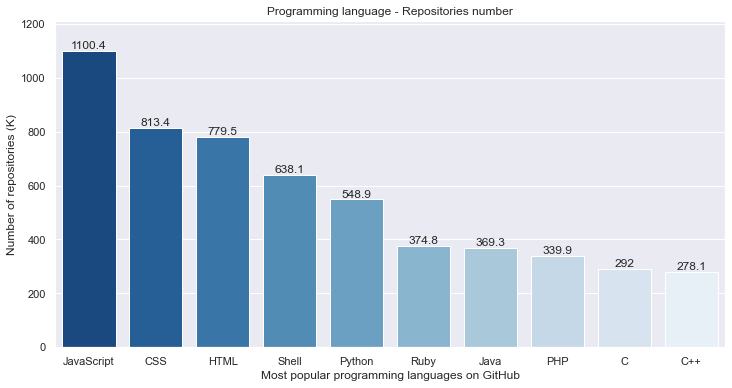

In [254]:
pal = sns.color_palette("Blues_r", len(tb))
rank = biggest_repos['num_repos/1K'].argsort()
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="language", y="num_repos/1K", data=biggest_repos, palette=np.array(pal[::-1])[rank], ci=False, ax=ax)
for i in ax.containers:
    ax.bar_label(i,)
ax.margins(y=0.1)

plt.xlabel('Most popular programming languages on GitHub')
plt.ylabel('Number of repositories (K)')
plt.title('Programming language - Repositories number')
plt.show()

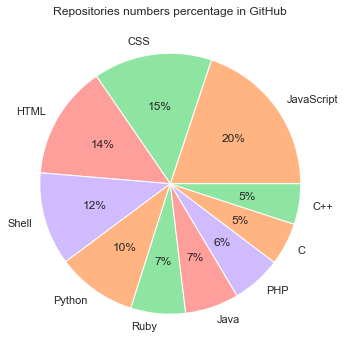

In [452]:
colors = sns.color_palette('pastel')[1:5]
plt.subplots(figsize=(12, 6))
plt.pie(biggest_repos['num_repos/1K'], labels = biggest_repos['language'], colors = colors, autopct='%.0f%%')
plt.title('Repositories numbers percentage in GitHub')
plt.show()

### Issues occured within repositories with different languages different years

In [255]:
df_issues.shape,  np.unique(df_issues['name']).shape

((3366, 4), (178,))

In [95]:
df_issues.head(5)

,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694
2,Python,2011,3,619
3,PHP,2011,3,560
4,Java,2011,3,420


In [224]:
df_pull_requests.head(5)

,name,year,quarter,count
14,C#,2011,4,291
15,Objective-C,2011,4,236
16,Scala,2011,4,200
17,Erlang,2011,4,149
19,Haskell,2011,4,111


In [281]:
df_issues_pop = df_issues[df_issues['name'].isin(biggest_repos['language'])]

issues_sum = pd.DataFrame(df_issues_pop.groupby(['name'])['count'].sum()).reset_index()
issues_sum['count'] = issues_sum['count'].div(1000).round(1)
issues_sum.rename(columns = {'count':'count/1000'}, inplace = True)
issues_sum = issues_sum.sort_values('count/1000', ascending=False)
issues_sum

,name,count/1000
5,JavaScript,6500.0
7,Python,4192.1
4,Java,3535.8
6,PHP,2240.4
1,C++,1940.7
8,Ruby,1292.6
0,C,1002.9
3,HTML,705.7
9,Shell,533.0
2,CSS,415.9


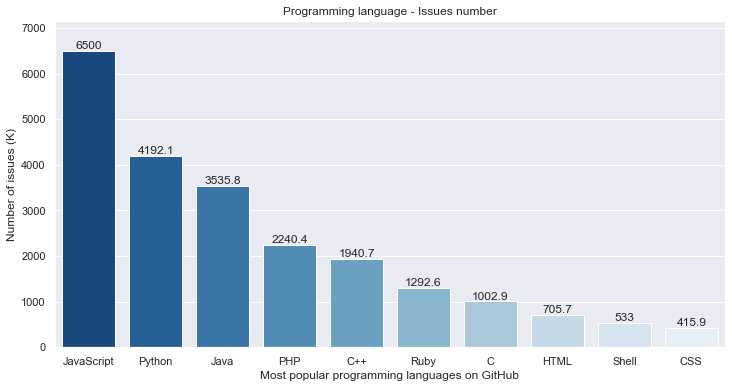

In [257]:
pal = sns.color_palette("Blues_r", len(tb))
rank = issues_sum['count/1000'].argsort()
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="name", y="count/1000", data=issues_sum, palette=np.array(pal[::-1])[rank], ci=False, ax=ax)
for i in ax.containers:
    ax.bar_label(i,)
ax.margins(y=0.1)

plt.xlabel('Most popular programming languages on GitHub')
plt.ylabel('Number of issues (K)')
plt.title('Programming language - Issues number')
plt.show()

one should notice that number of issues may be effected by number of repositories. The more repositories, the more issues. But is that really the case?

In [258]:
issues_vs_repos = issues_sum.merge(biggest_repos, left_on='name', right_on='language')
issues_vs_repos = issues_vs_repos.drop(columns='language')
issues_vs_repos['issues_per_repository'] = issues_vs_repos['count/1000'] / issues_vs_repos['num_repos/1K']
issues_vs_repos

,name,count/1000,num_repos/1K,issues_per_repository
0,JavaScript,6500.0,1100.4,5.906943
1,Python,4192.1,548.9,7.637275
2,Java,3535.8,369.3,9.574330
3,PHP,2240.4,339.9,6.591350
4,C++,1940.7,278.1,6.978425
5,Ruby,1292.6,374.8,3.448773
6,C,1002.9,292.0,3.434589
7,HTML,705.7,779.5,0.905324
8,Shell,533.0,638.1,0.835292
9,CSS,415.9,813.4,0.511311


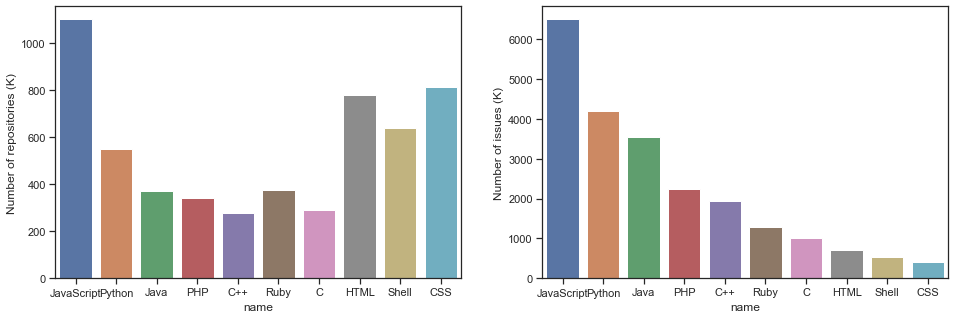

In [447]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.barplot(x = 'name', y = 'num_repos/1K', data = issues_vs_repos)
plt.ylabel('Number of repositories (K)')

plt.subplot(1, 2, 2)
sns.barplot(x = 'name', y = 'count/1000', data = issues_vs_repos)
plt.ylabel('Number of issues (K)')

plt.show()

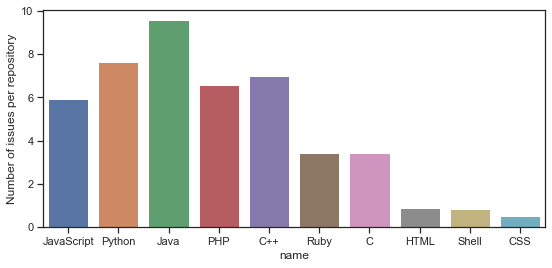

In [448]:
plt.subplots(figsize=(9, 4))
sns.barplot(x = 'name', y = 'issues_per_repository', data = issues_vs_repos)
plt.ylabel('Number of issues per repository')
plt.show()

#### language trends for different years

In [282]:
df_issues_pop = pd.DataFrame(df_issues_pop.groupby(['name','year'])['count'].sum())
df_issues_pop.head(3)

count
name year       
C    2011   1276
     2012  16423
     2013  44471

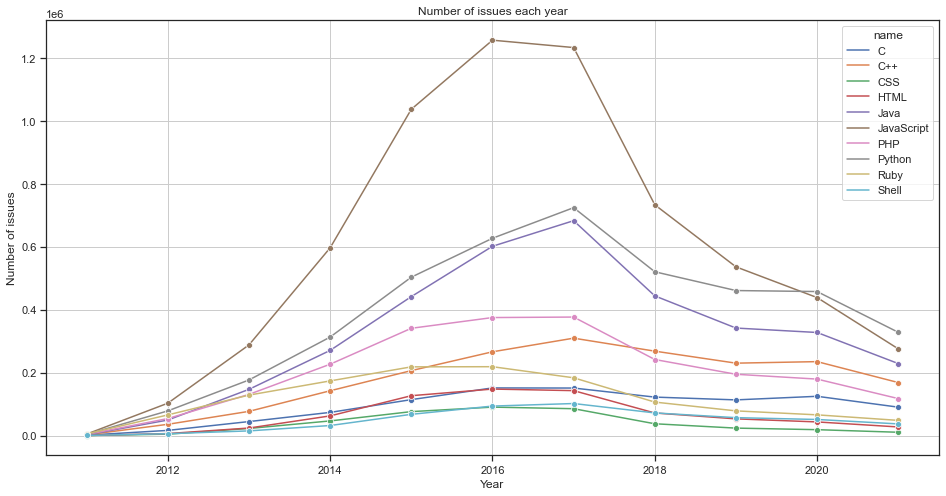

In [453]:
plt.rcParams['axes.facecolor'] = 'white'
plt.subplots(figsize=(16, 8))
sns.set(style="ticks")
sns.lineplot(data=df_issues_pop, x="year", y="count", hue="name", marker = 'o')
plt.xlabel('Year')
plt.ylabel('Number of issues')
plt.grid()
plt.title('Number of issues each year')
plt.show()

### Pull requests within different years for different languages

In [188]:
df_pull_requests.head(4)

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367


#### language trends for different years

In [261]:
pop_pull_requests = df_pull_requests[df_pull_requests['name'].isin(biggest_repos['language'])]
pop_pull_requests.head(5)

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216


In [450]:
pop_pull_requests['year_quarter'] = pop_pull_requests['year'] + pop_pull_requests['quarter']/100
pop_pull_requests.drop(columns=['year', 'quarter'])

,name,count,year_quarter
0,Ruby,632,2011.03
1,PHP,484,2011.03
2,Python,423,2011.03
3,JavaScript,367,2011.03
4,Java,216,2011.03
...,...,...,...
3376,PHP,38201,2021.04
3378,C,22792,2021.04
3380,HTML,17216,2021.04
3381,Shell,15836,2021.04


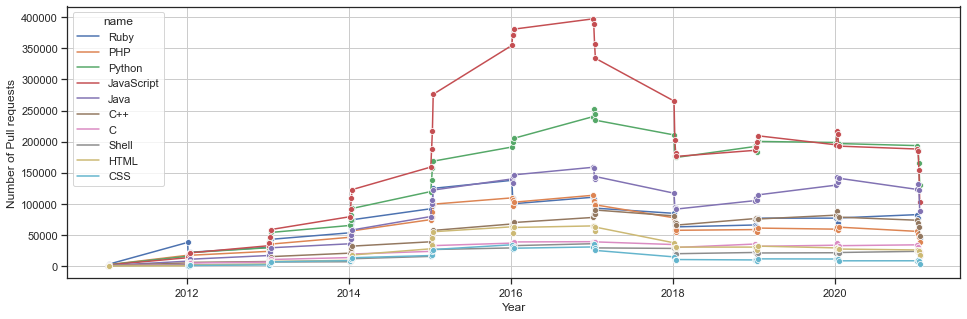

In [332]:
plt.rcParams['axes.facecolor'] = 'white'
plt.subplots(figsize=(16, 5))
sns.set(style="ticks")
sns.lineplot(data=pop_pull_requests, x="year_quarter", y="count", hue="name", marker = 'o')
plt.xlabel('Year')
plt.ylabel('Number of Pull requests')
plt.grid()
plt.show()


In [325]:
pull_requests_2021 = pop_pull_requests[pop_pull_requests['year'] == 2021].groupby('name')['count'].sum().reset_index()
pull_requests_2012 = pop_pull_requests[pop_pull_requests['year'] == 2012].groupby('name')['count'].sum().reset_index()

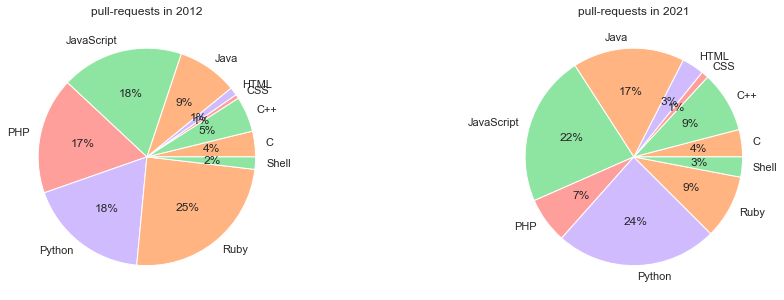

In [328]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

colors = sns.color_palette('pastel')[1:5]

plt.subplot(1, 2, 1)
plt.pie(pull_requests_2012['count'], labels = pull_requests_2012['name'].unique(), colors = colors, autopct='%.0f%%')
plt.title('pull-requests in 2012')

plt.subplot(1, 2, 2)
plt.pie(pull_requests_2021['count'], labels = pull_requests_2021['name'].unique(), colors = colors, autopct='%.0f%%')
plt.title('pull-requests in 2021')

plt.show()

In [365]:
pop_pull_requests_year = pop_pull_requests.groupby(['name', 'year'])['count'].sum().reset_index()
pop_pull_requests_year
pop_pull_requests_year.tail(3)

,name,year,count
106,Shell,2019,84532
107,Shell,2020,89379
108,Shell,2021,84124


10 11


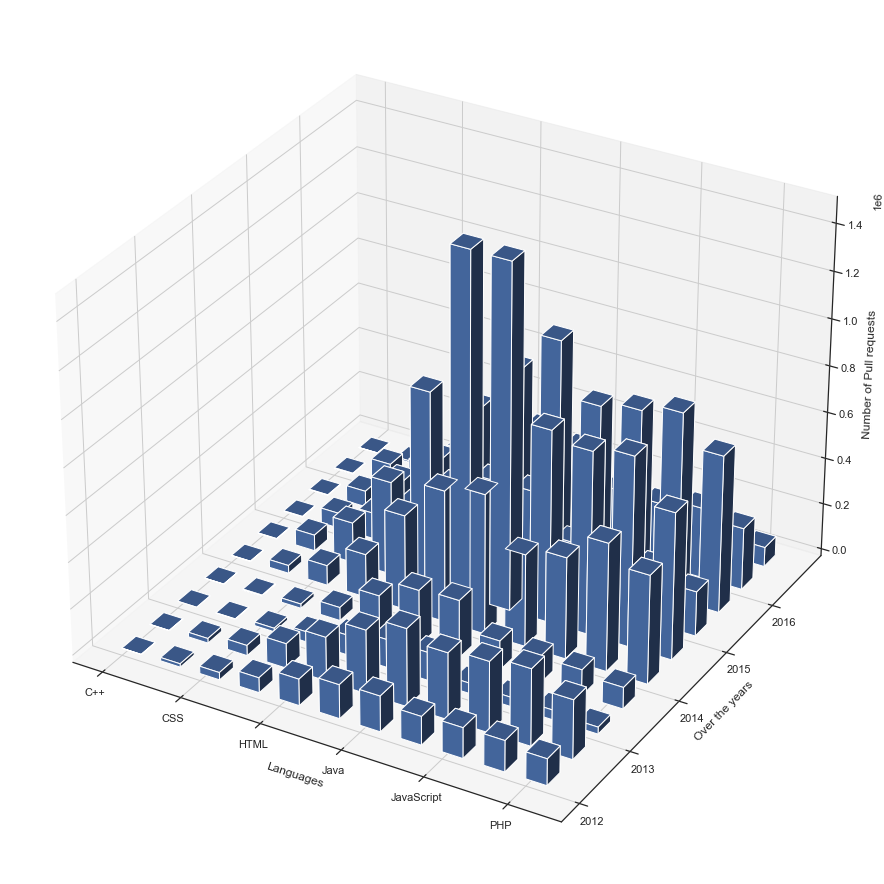

In [451]:
fig = plt.figure(figsize=[20, 16])
ax = plt.axes(projection = "3d")
 
languages = np.unique(pop_pull_requests_year['name'])
years = np.unique(pop_pull_requests_year['year'])

numOfRows = len(languages) #languages
numOfCols = len(years) #years
print(numOfRows, numOfCols)

data = np.zeros([numOfRows, numOfCols])
for i in range(numOfRows):
    for j in range(numOfCols):
        a = pop_pull_requests_year.loc[(pop_pull_requests_year["year"] == years[j]) & (pop_pull_requests_year["name"] == languages[i]), "count"]
        if len(a) > 0:
            data[i][j] = a

xpos = np.arange(0, numOfCols, 1)
ypos = np.arange(0, numOfRows, 1)
xpos, ypos = np.meshgrid(xpos, ypos )

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(numOfCols * numOfRows)
 
dx = np.ones(numOfRows * numOfCols) * 0.5
dy = np.ones(numOfCols * numOfRows) * 0.5
dz = data.flatten()
    
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
ax.set_xticklabels(languages)
ax.set_yticklabels(years)
 
ax.set_xlabel('Languages')
ax.set_ylabel('Over the years')
ax.set_zlabel('Number of Pull requests')
 
plt.show()